# request 요청이 거절당한 경우 헤더 변경하여 크롤링하기  


### 뉴스 링크 크롤링

네이버 뉴스는 1. 각 언론사에에 게재된 뉴스와 2. 네이버 뉴스 플랫폼에 기재된 뉴스로 나뉩니다. 
각 언론사 홈페이지마다 html 형식이 다르기 때문에 통일된 html형식을 가지고 있는 네이버 뉴스 플랫폼 내의 기사들을 수집하도록 하겠습니다.   
네이버 뉴스 플랫폼 링크는 아래 사진 태그 위치에서 얻을 수 있습니다. 

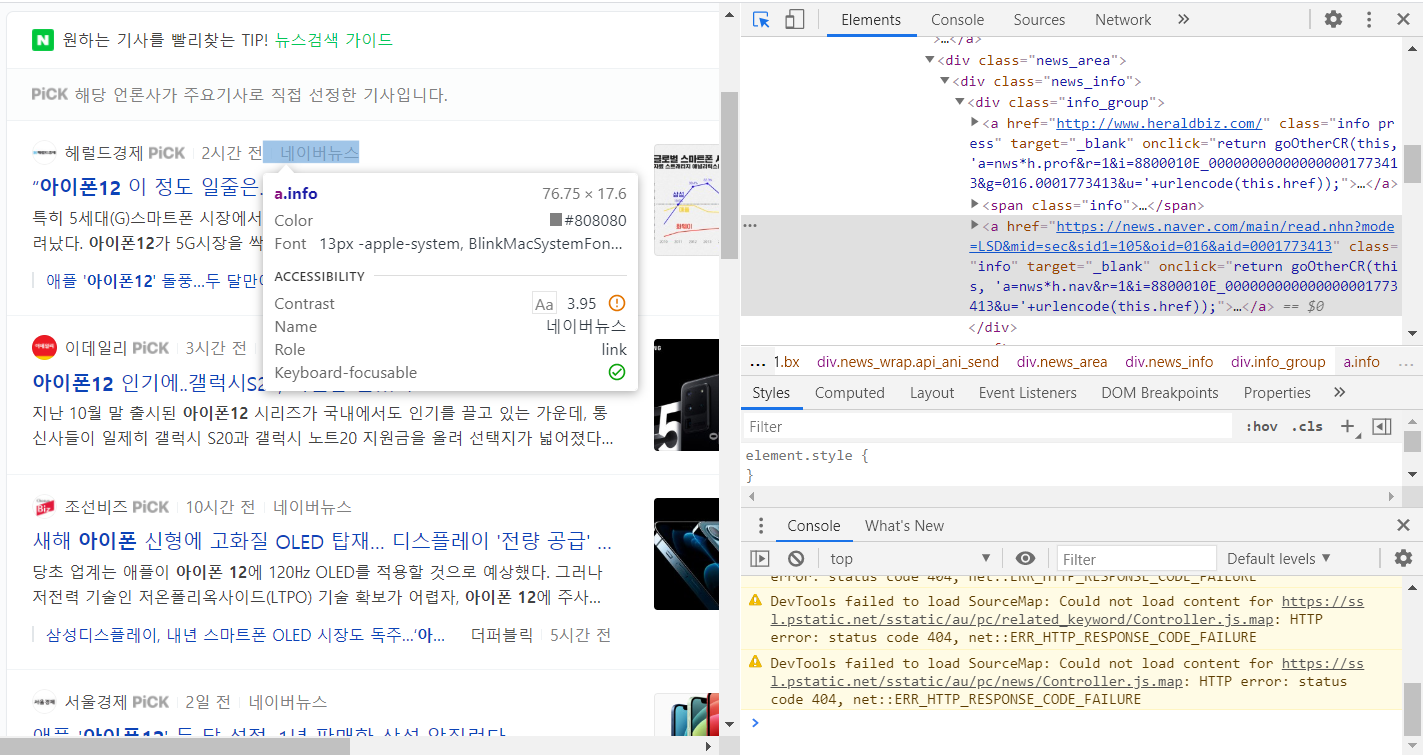

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
news_urls = []

In [ ]:
# 가져올 페이지 수
total_page = 10

for i in range(total_page):
    page = i+1
    start = page*10 - 1 #`1:1 2:11 3:21
    # url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EA%B0%A4%EB%9F%AD%EC%8B%9C%EB%85%B8%ED%8A%B8' + '&start={}'.format(start)
    url = 'https://search.naver.com/search.naver'
    
    params = {
        'where' : 'news',
        'sm':'tab_jum',
        'query':'갤럭시노트',
        'start':start
    }
    
    resp = requests.get(url, params=params)

    soup = BeautifulSoup(resp.content, 'lxml')
    # a_tags = soup.select('a.info') # class 에 info가 들어가는 a_tag
    a_tags = soup.select('a[class=info]') # class 에 info인 a_tag

    for a_tag in a_tags:
        news_urls.append(a_tag['href'])

news_urls

['https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=417&aid=0000796266',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=032&aid=0003136154',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=101&oid=003&aid=0011065788',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=293&aid=0000038408',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=092&aid=0002251214',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=011&aid=0004031490',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=104&oid=030&aid=0003004656',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=008&aid=0004720190',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=009&aid=0004933260',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=008&aid=0004720341',
 'https://news.naver.com/main/read.naver?mode=LSD&mid=sec&sid1=105&oid=014&aid=0

In [ ]:
len(news_urls)

46

In [ ]:
dic_news = {
    '언론사':[],
    '제목':[],
    '날짜':[],
    '기사내용':[]
}

### 헤더 추가
아래와 같이 request 요청이 거절당한 경우는 무분별한 크롤링을 해당 사이트에서 막아놓은 것입니다. 이런 경우에는 사용자가 직접 접속했다는 정보를 추가하여 문제를 해결할 수 있습니다.
즉, user-agent 정보를 header에 넣어주어야 합니다.

In [ ]:
for news_url in news_urls:
    headers = {
            'referer': 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=468&aid=0000755712',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36'
        }

    resp = requests.get(news_url, headers=headers)
    if resp.status_code != 200:
        print(resp)
    
    soup = BeautifulSoup(resp.content, 'lxml')
    press = soup.select('div.press_logo img')[0]['title']
    title = soup.select('div.article_info h3#articleTitle')[0].text
    date = soup.select('div.article_info div.sponsor span.t11')[0].text
    contents = soup.select('div#articleBodyContents ')[0].text.replace('\n', '').replace('// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}', '')
  
    values = [press, title, date, contents]

    for k, v in zip(dic_news.keys(), values):
        dic_news[k].append(v)

    # dic_news['언론사'].append(press)
    # dic_news['제목'].append(title)
    # dic_news['날짜'].append(date)
    # dic_news['기사내용'].append(contents)

In [ ]:
import pandas as pd

df_news = pd.DataFrame(dic_news)
df_news

,언론사,제목,날짜,기사내용
0,머니S,"갤럭시 S22 지원금 '최대 55만원'으로 높여…삼성, GOS 의식했나",2022.03.22. 오전 7:15,삼성전자 상반기 플래그십(최상급 기종) '갤럭시 S22 울트라'의 공시지원금이 대폭...
1,경향신문,"작년 세계에서 가장 많이 팔린 프리미엄 스마트폰은 아이폰…2위 갤럭시, 점유율은 하락",2022.03.24. 오전 11:09,\t\t[경향신문] 카운터포인트 리서치 제공지난해 세계에서 가장 많이 팔린 프리미엄...
2,뉴시스,위기의 삼성…'GOS' 논란에 떠오른 '노트7' 악몽,2022.03.16. 오후 2:41,기사내용 요약고지 없이 성능 제어…소비자 기만·과대 광고 비판뿔난 소비자들 주총장 ...
3,블로터,"삼성전자, AI 카메라 강조한 중저가폰 '갤럭시A 33·53 5G' 공개",2022.03.17. 오후 11:00,갤럭시 A53 5G 어썸블루 모델. (사진=삼성전자)삼성전자가 17일 '삼성 갤럭시...
4,ZDNet Korea,"中 비보, 갤노트 자리 노릴 'X 노트' 준비 중",2022.03.22. 오전 9:26,삼성 OLED 및 카메라 센서 채용중국 스마트폰 브랜드 비보가 삼성전자의 갤럭시 노...
5,서울경제,갤럭시S22 울트라 지원금 터졌다… ‘80만원대' 등장,2022.03.19. 오전 8:01,"갤럭시S22 울트라, 최대 55만 원 지원금실 구매가 81만 원 대 등장출시 3주 ..."
6,전자신문,"4세대 '갤럭시Z', 어떻게 나올까",2022.03.19. 오전 12:52,\t\t삼성전자가 올여름 선보일 4세대 폴더블 스마트폰은 어떤 모습일까. 폼팩터 자...
7,머니투데이,다시 온 갤럭시 위기…'배터리 폭발' 노트7 사태 되새겨야,2022.03.15. 오후 6:00,\t\t[편집자주] GOS 사태로 갤럭시가 신뢰의 위기에 봉착했다. 세계 1위를 굳...
8,매일경제,"갤럭시폰 게임성능 제한 100% 풀었다…삼성, 소비자·임직원에 '사과'",2022.03.11. 오후 12:32,"소비자 위해 SW 업데이트게임성능 제한해제 권한줘노태문 사장, 임직원에 사과기본앱 ..."
9,머니투데이,"다시 떠오르는 '데스노트' 악몽…GOS發 위기 탈출, '이것'에 달렸다",2022.03.16. 오전 9:00,\t\t[편집자주] GOS 사태로 갤럭시가 신뢰의 위기에 봉착했다. 세계 1위를 굳...


In [ ]:
df_news.to_csv?

In [ ]:
df_news.to_csv('갤럭시노트_뉴스기사.csv', index=False, encoding='utf-8-sig')

In [ ]:
pd.read_csv?

In [ ]:
df_news2 = pd.read_csv('갤럭시노트_뉴스기사.csv', index_col='날짜')
df_news2

,언론사,제목,기사내용
날짜,,,
2022.03.22. 오전 7:15,머니S,"갤럭시 S22 지원금 '최대 55만원'으로 높여…삼성, GOS 의식했나",삼성전자 상반기 플래그십(최상급 기종) '갤럭시 S22 울트라'의 공시지원금이 대폭...
2022.03.24. 오전 11:09,경향신문,"작년 세계에서 가장 많이 팔린 프리미엄 스마트폰은 아이폰…2위 갤럭시, 점유율은 하락",\t\t[경향신문] 카운터포인트 리서치 제공지난해 세계에서 가장 많이 팔린 프리미엄...
2022.03.16. 오후 2:41,뉴시스,위기의 삼성…'GOS' 논란에 떠오른 '노트7' 악몽,기사내용 요약고지 없이 성능 제어…소비자 기만·과대 광고 비판뿔난 소비자들 주총장 ...
2022.03.17. 오후 11:00,블로터,"삼성전자, AI 카메라 강조한 중저가폰 '갤럭시A 33·53 5G' 공개",갤럭시 A53 5G 어썸블루 모델. (사진=삼성전자)삼성전자가 17일 '삼성 갤럭시...
2022.03.22. 오전 9:26,ZDNet Korea,"中 비보, 갤노트 자리 노릴 'X 노트' 준비 중",삼성 OLED 및 카메라 센서 채용중국 스마트폰 브랜드 비보가 삼성전자의 갤럭시 노...
2022.03.19. 오전 8:01,서울경제,갤럭시S22 울트라 지원금 터졌다… ‘80만원대' 등장,"갤럭시S22 울트라, 최대 55만 원 지원금실 구매가 81만 원 대 등장출시 3주 ..."
2022.03.19. 오전 12:52,전자신문,"4세대 '갤럭시Z', 어떻게 나올까",\t\t삼성전자가 올여름 선보일 4세대 폴더블 스마트폰은 어떤 모습일까. 폼팩터 자...
2022.03.15. 오후 6:00,머니투데이,다시 온 갤럭시 위기…'배터리 폭발' 노트7 사태 되새겨야,\t\t[편집자주] GOS 사태로 갤럭시가 신뢰의 위기에 봉착했다. 세계 1위를 굳...
2022.03.11. 오후 12:32,매일경제,"갤럭시폰 게임성능 제한 100% 풀었다…삼성, 소비자·임직원에 '사과'","소비자 위해 SW 업데이트게임성능 제한해제 권한줘노태문 사장, 임직원에 사과기본앱 ..."
